In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

resumeDataSet = pd.read_csv('UpdatedResumeDataSet.csv', encoding='utf-8')
resumeDataSet['cleaned_resume'] = ''
resumeDataSet.head()
      

,ID,Category,Resume,cleaned_resume
0,1,Data Science,Skills * Programming Languages: Python (pandas...,
1,2,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,3,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,4,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,5,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [2]:
resumeDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              962 non-null    int64 
 1   Category        962 non-null    object
 2   Resume          962 non-null    object
 3   cleaned_resume  962 non-null    object
dtypes: int64(1), object(3)
memory usage: 30.2+ KB


In [3]:
print ("Displaying the distinct categories of resume:\n\n ")
print (resumeDataSet['Category'].unique())


Displaying the distinct categories of resume:

 
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [4]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category:\n\n")
print (resumeDataSet['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category:


Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64


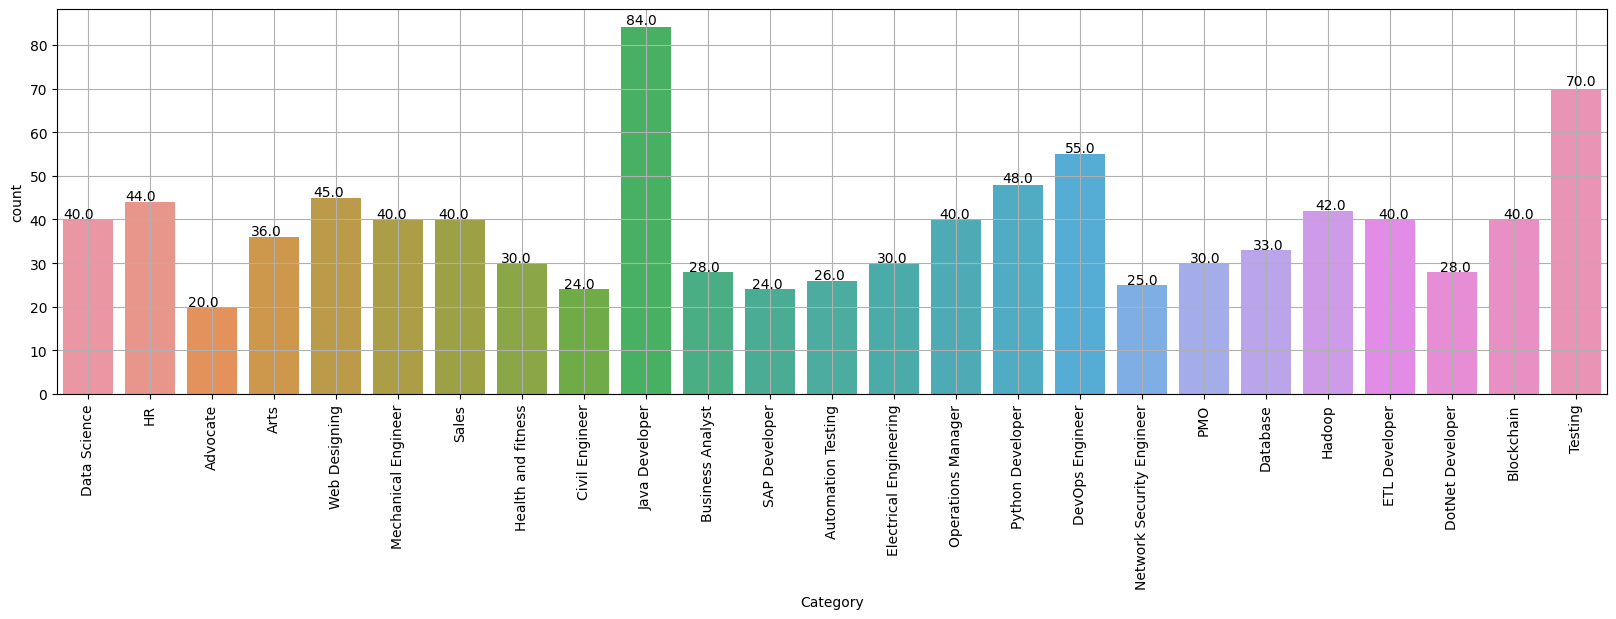

In [5]:
import seaborn as sns
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=resumeDataSet)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

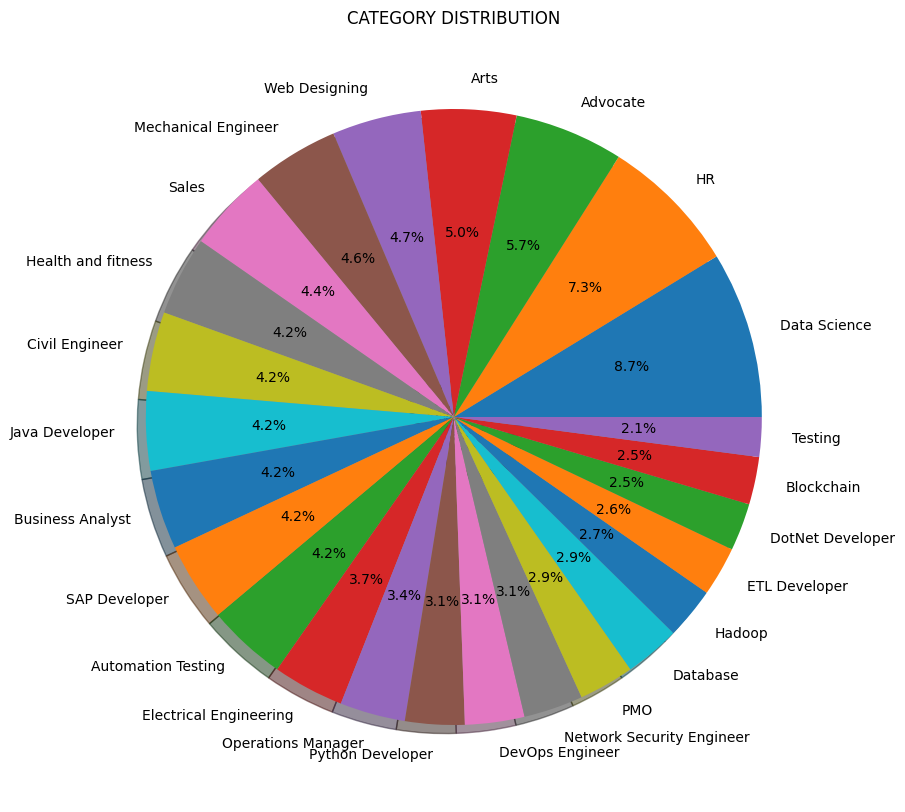

In [6]:
from matplotlib.gridspec import GridSpec
targetCounts = resumeDataSet['Category'].value_counts()
targetLabels  = resumeDataSet['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(22,22))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()

In [7]:
print(resumeDataSet.columns)


Index(['ID', 'Category', 'Resume', 'cleaned_resume'], dtype='object')


In [8]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
resumeDataSet['cleaned_resume'] = resumeDataSet['Resume'].apply(lambda x: cleanResume(x))



In [9]:
resumeDataSet.head()


,ID,Category,Resume,cleaned_resume
0,1,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,2,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,3,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,4,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,5,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [10]:
resumeDataSet_d=resumeDataSet.copy()

In [11]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resumeDataSet['Resume'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = cleanResume(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)


[('Exprience', 3829), ('months', 3233), ('company', 3130), ('Details', 2967), ('description', 2634), ('1', 2134), ('Project', 1808), ('project', 1579), ('6', 1499), ('data', 1438), ('team', 1424), ('Maharashtra', 1385), ('year', 1244), ('Less', 1137), ('January', 1086), ('using', 1041), ('Skill', 1018), ('Pune', 1016), ('Management', 1010), ('SQL', 990), ('Ltd', 934), ('management', 927), ('C', 896), ('Engineering', 855), ('Education', 833), ('Developer', 806), ('Java', 773), ('2', 754), ('development', 752), ('monthsCompany', 746), ('Pvt', 730), ('application', 727), ('System', 715), ('reports', 697), ('business', 696), ('India', 693), ('requirements', 693), ('I', 690), ('various', 688), ('A', 688), ('Data', 674), ('The', 672), ('University', 656), ('process', 648), ('Testing', 646), ('test', 638), ('Responsibilities', 637), ('system', 636), ('testing', 634), ('Software', 632)]


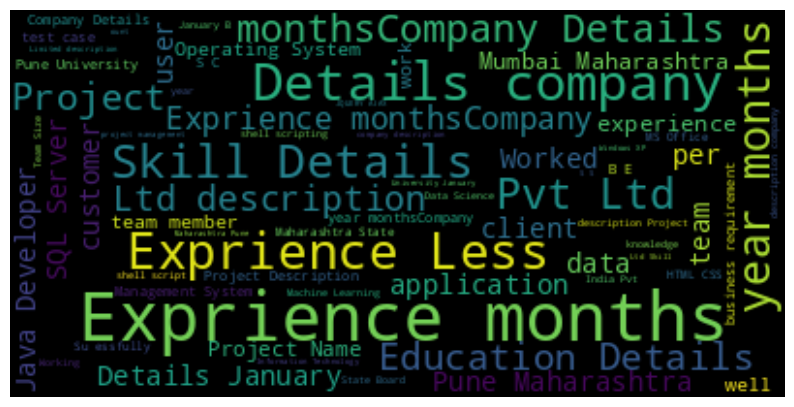

In [12]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])

In [14]:
resumeDataSet.head()

,ID,Category,Resume,cleaned_resume
0,1,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,2,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,3,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,4,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,5,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [15]:
resumeDataSet.Category.value_counts()

Category
15    84
23    70
8     55
20    48
24    45
12    44
13    42
3     40
10    40
18    40
6     40
22    40
16    40
1     36
7     33
11    30
14    30
19    30
4     28
9     28
2     26
17    25
21    24
5     24
0     20
Name: count, dtype: int64

In [16]:
resumeDataSet_d.Category.value_counts() #understanding decode LabelEncoder

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

In [17]:
del resumeDataSet_d #clearing the space occupied 

In [18]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(769, 7351)
(193, 7351)


In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC

requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print("Feature completed .....")

# Initialize the classifier
clf = SVC()

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Perform cross-validation
scores = cross_val_score(clf, WordFeatures, requiredTarget, cv=cv)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())



Feature completed .....
Cross-validation scores: [0.98963731 0.97927461 0.99479167 0.99479167 0.98958333]
Mean accuracy: 0.9896157167530223


In [20]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set:     0.98


Accuracy of KNeighbors Classifier on test set: 0.98
Confusion Matrix:
[[ 4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  3  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  1
   0]
 [ 0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  1  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  1  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0 

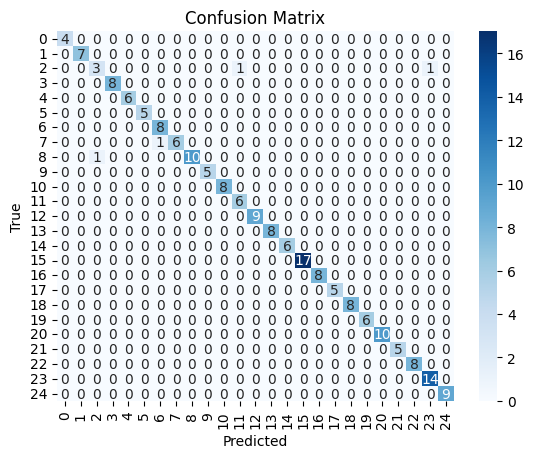

In [21]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Fit the classifier and make predictions
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

# Calculate accuracy
accuracy = clf.score(X_test, y_test)
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(accuracy))

# Create the confusion matrix
cm = confusion_matrix(y_test, prediction)

# Print the confusion matrix
print('Confusion Matrix:')
print(cm)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, prediction, average='macro')
recall = recall_score(y_test, prediction, average='macro')
f1 = f1_score(y_test, prediction, average='macro')

# Print precision, recall, and F1 score
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1 Score: {:.2f}'.format(f1))

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [22]:
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       0.75      0.60      0.67         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       0.89      1.00      0.94         8
           7       1.00      0.86      0.92         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         8
          11       0.86      1.00      0.92         6
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.

In [23]:
import joblib

# Specify the filename for the exported model
ResumeScreening = 'model.pkl'

# Export the model
joblib.dump(clf, ResumeScreening)


['model.pkl']

In [24]:
# Load the model
loaded_model = joblib.load(ResumeScreening)


In [25]:
import pandas as pd
import re
import string
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import joblib

# Load the resume dataset
resumeDataSet = pd.read_csv('UpdatedResumeDataSet.csv', encoding='utf-8')

# Define a function to clean and preprocess the resume text
def clean_resume(resume_text):
    # Convert text to lowercase
    resume_text = resume_text.lower()
    
    # Remove special characters, digits, and punctuation
    resume_text = re.sub('\w*\d\w*', '', resume_text)
    resume_text = resume_text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove extra whitespaces
    resume_text = re.sub('\s+', ' ', resume_text)
    
    return resume_text

# Apply the preprocessing function to the 'Resume' column and create the 'cleaned_resume' column
resumeDataSet['cleaned_resume'] = resumeDataSet['Resume'].apply(clean_resume)

# Split the data into features (X) and labels (y)
X = resumeDataSet['cleaned_resume']
y = resumeDataSet['Category']

# Create a CountVectorizer object to convert the text into numerical features
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Train the model
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Evaluate the model
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

print('Accuracy of the model on the training set: {:.2f}'.format(train_accuracy))
print('Accuracy of the model on the test set:     {:.2f}'.format(test_accuracy))

# Save the trained model
joblib.dump(clf, 'resume_classification_model.pkl')


Accuracy of the model on the training set: 1.00
Accuracy of the model on the test set:     0.99


['resume_classification_model.pkl']

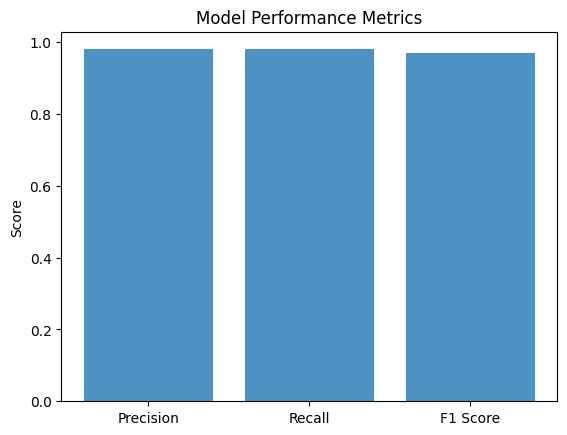

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the precision, recall, and F1 score values
precision = 0.98
recall = 0.98
f1_score = 0.97

metrics = ['Precision', 'Recall', 'F1 Score']
values = [precision, recall, f1_score]

# Set the bar positions
x_pos = np.arange(len(metrics))

# Create the bar chart
plt.bar(x_pos, values, align='center', alpha=0.8)

# Set the labels and title
plt.xticks(x_pos, metrics)
plt.ylabel('Score')
plt.title('Model Performance Metrics')

# Display the bar chart
plt.show()


In [27]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Define the cleanResume function
def cleanResume(text):
    # Convert to lowercase
    text = text.lower()

    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Join tokens back into a string
    cleaned_text = ' '.join(filtered_tokens)

    return cleaned_text




In [28]:

# Sample job dataset
jobDataSet = pd.read_csv('updated_jobs.csv', encoding='utf-8')



In [29]:
jobDataSet = pd.read_csv('updated_jobs.csv', encoding='utf-8')
print(jobDataSet.head())
print(jobDataSet.columns)

                                              job_id      company_id   
0     kms-technology:jrsr_qa_engineer_kms_labs_bonus  kms-technology  \
1           kms-technology:engineering_manager_bonus  kms-technology   
2  kms-technology:fullstack_mobile_mobilenodejs_k...  kms-technology   
3  kms-technology:jrsrprincipal_java_developer_bonus  kms-technology   
4      kms-technology:product_manager_kms_labs_bonus  kms-technology   

                                   job_name   
0     (Jr/Sr) QA Engineer, KMS Labs - BONUS  \
1               Engineering Manager - BONUS   
2  Fullstack Mobile (Mobile,NodeJs) Kobiton   
3   (Jr/Sr/Principal) Java Developer- BONUS   
4         Product Manager, KMS Labs - BONUS   

                                      taglist   
0                   QA QC   English   Tester   \
1          Project Manager   Agile   English    
2   NodeJS   React Native   Fresher Accepted    
3                 Java   JavaScript   Spring    
4        Product Manager   English   Ma

In [30]:
jobDataSet['cleaned_description'] = ''

In [31]:
# Preprocessing job descriptions
for i in range(len(jobDataSet)):
    cleaned_text = cleanResume(jobDataSet['job_name'].iloc[i])
    jobDataSet['cleaned_description'].iloc[i] = cleaned_text



In [32]:

# Vectorize job descriptions
jobDescriptions = jobDataSet['cleaned_description'].values
job_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english')
job_vectorizer.fit(jobDescriptions)
jobFeatures = job_vectorizer.transform(jobDescriptions)

In [33]:
# Load resume dataset
resumeDataSet = pd.read_csv('UpdatedResumeDataSet.csv', encoding='utf-8')

# Define preprocess_text function to clean and process resume text
def preprocess_text(text):
    # Add your cleaning and processing steps here
    cleaned_text = text.str.lower()  # Convert to lowercase
    return cleaned_text

# Apply preprocess_text function to create cleaned_resume column
resumeDataSet['cleaned_resume'] = preprocess_text(resumeDataSet['Resume'])

# Vectorize job descriptions
jobDescriptions = jobDataSet['cleaned_description'].values
job_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english')
job_vectorizer.fit(jobDescriptions)
jobFeatures = job_vectorizer.transform(jobDescriptions)

# Vectorize the input resume
resumeFeatures = job_vectorizer.transform(resumeDataSet['cleaned_resume'])


In [34]:
resumeDataSet = pd.read_csv('UpdatedResumeDataSet.csv', encoding='utf-8')
resumeDataSet['cleaned_resume'] = preprocess_text(resumeDataSet['Resume'])  # Assuming you have a preprocess_text function to clean and process the resume text

resumeFeatures = job_vectorizer.transform(resumeDataSet['cleaned_resume'])


In [35]:
# Vectorize the input resume
resumeDataSet = pd.read_csv('UpdatedResumeDataSet.csv', encoding='utf-8')
resumeDataSet['cleaned_resume'] = ''


In [36]:
# Calculate cosine similarity between resume and job descriptions
similarity_scores = cosine_similarity(resumeFeatures, jobFeatures)


In [37]:

# Find top-k most similar job descriptions
k = 5  # Number of recommended jobs
top_indices = np.argsort(similarity_scores[0])[::-1][:k]
recommended_jobs = jobDataSet.iloc[top_indices]

In [38]:
print(jobDataSet.columns)


Index(['job_id', 'company_id', 'job_name', 'taglist', 'location',
       'three_reasons', 'description', 'cleaned_description'],
      dtype='object')


In [39]:
# Generate top recommended jobs for each resume
top_recommendations = np.argsort(similarity_scores, axis=1)[:, ::-1]

# Print recommended jobs with person's ID
print("Recommended Jobs:")
recommended_jobs = set()  # Set to store recommended jobs

for i, recommendations in enumerate(top_recommendations):
    person_id = resumeDataSet.loc[i, 'ID']  # Assuming 'Category' is the column name for person's ID in the resume dataset
    print(f"Recommendations for Person ID: {person_id}")

    for job_index in recommendations:
        recommended_job = jobDataSet.loc[job_index, 'job_id']  # Assuming 'job_id' is the column name for job IDs in the job dataset

        if recommended_job not in recommended_jobs:
            recommended_jobs.add(recommended_job)
            print(f"Recommended Job: {recommended_job}")

            if len(recommended_jobs) >= 2:  # Change the value to control the number of recommended jobs per person
                break

    print()  # Print a blank line to separate the recommendations for each person


Recommended Jobs:
Recommendations for Person ID: 1
Recommended Job: simple-tech-investment:data_analytics_manager
Recommended Job: vtc-digicom:information_security_engineer_system

Recommendations for Person ID: 2
Recommended Job: zalora-group:sr_data_scientist_machine_learning_r

Recommendations for Person ID: 3
Recommended Job: dai-ichi-life-viet-nam:machine_learning_engineer_java_python

Recommendations for Person ID: 4
Recommended Job: greenfeed:sap_data_engineer

Recommendations for Person ID: 5
Recommended Job: fram:senior_java_2_months_signon_bonus

Recommendations for Person ID: 6
Recommended Job: motorola-solutions:machine_learning_engineer_python_c

Recommendations for Person ID: 7
Recommended Job: vietnam-international-bank-vib:data_science_data_analyst_bi

Recommendations for Person ID: 8
Recommended Job: homegy:software_developer_c_language_linux

Recommendations for Person ID: 9
Recommended Job: ghn:data_engineer_python_sql_mysql

Recommendations for Person ID: 10
Recomme

Recommended Job: fpt-information-system-corporation:fullstack_software_engineer_java_net

Recommendations for Person ID: 747
Recommended Job: uto-technology:05_jrmidsr_backend_dev_node_js_sql

Recommendations for Person ID: 748
Recommended Job: ecr-vietnam-co-ltd:net_developer_c_javascript

Recommendations for Person ID: 749
Recommended Job: hiteco:tuyển_10_fresherjunior_java_developer

Recommendations for Person ID: 750
Recommended Job: wiin-viet-nam:backend_developer_php_java_aws

Recommendations for Person ID: 751
Recommended Job: nct-corporation:product_owner

Recommendations for Person ID: 752
Recommended Job: qa-solutions:winforms_developer_net_c_sql

Recommendations for Person ID: 753
Recommended Job: wizeline:software_engineers_pythonjava

Recommendations for Person ID: 754
Recommended Job: add-on-development:05_net_developer_c_net_sql

Recommendations for Person ID: 755
Recommended Job: papaya-insurtech:junior_dev_javascript_net_python

Recommendations for Person ID: 756
Recom

In [40]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

data = pd.read_csv("updated_jobs.csv")
print(data.head())

                                              job_id      company_id   
0     kms-technology:jrsr_qa_engineer_kms_labs_bonus  kms-technology  \
1           kms-technology:engineering_manager_bonus  kms-technology   
2  kms-technology:fullstack_mobile_mobilenodejs_k...  kms-technology   
3  kms-technology:jrsrprincipal_java_developer_bonus  kms-technology   
4      kms-technology:product_manager_kms_labs_bonus  kms-technology   

                                   job_name   
0     (Jr/Sr) QA Engineer, KMS Labs - BONUS  \
1               Engineering Manager - BONUS   
2  Fullstack Mobile (Mobile,NodeJs) Kobiton   
3   (Jr/Sr/Principal) Java Developer- BONUS   
4         Product Manager, KMS Labs - BONUS   

                                      taglist   
0                   QA QC   English   Tester   \
1          Project Manager   Agile   English    
2   NodeJS   React Native   Fresher Accepted    
3                 Java   JavaScript   Spring    
4        Product Manager   English   Ma

In [41]:
data.isnull().sum()

job_id             0
company_id         0
job_name           0
taglist            0
location           0
three_reasons    314
description        0
dtype: int64

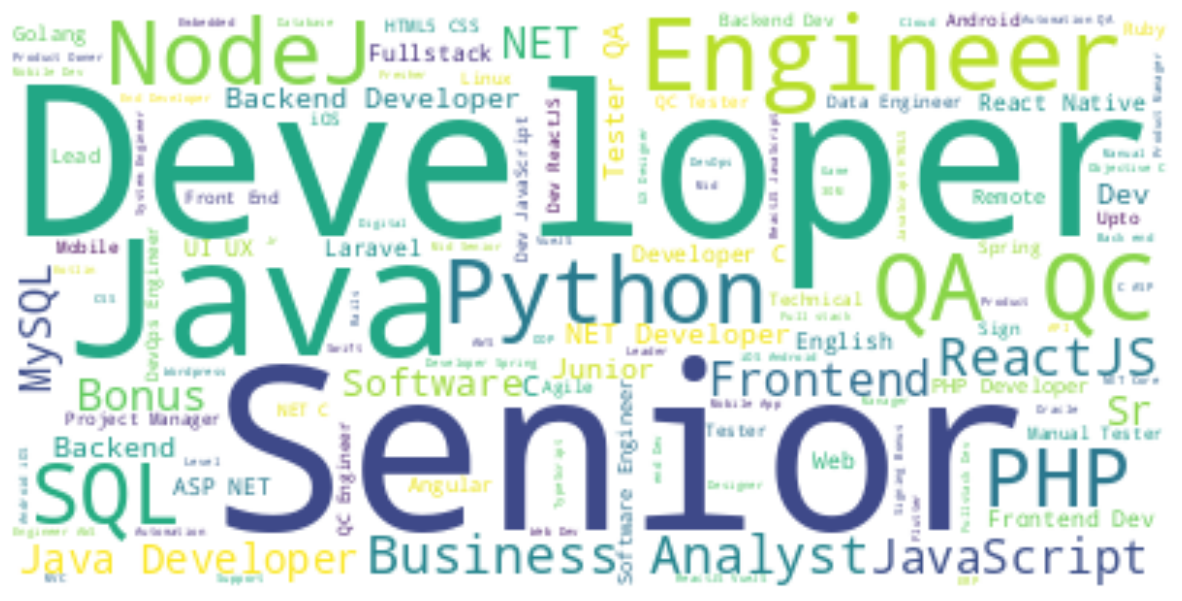

In [42]:
text = " ".join(i for i in data["job_name"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

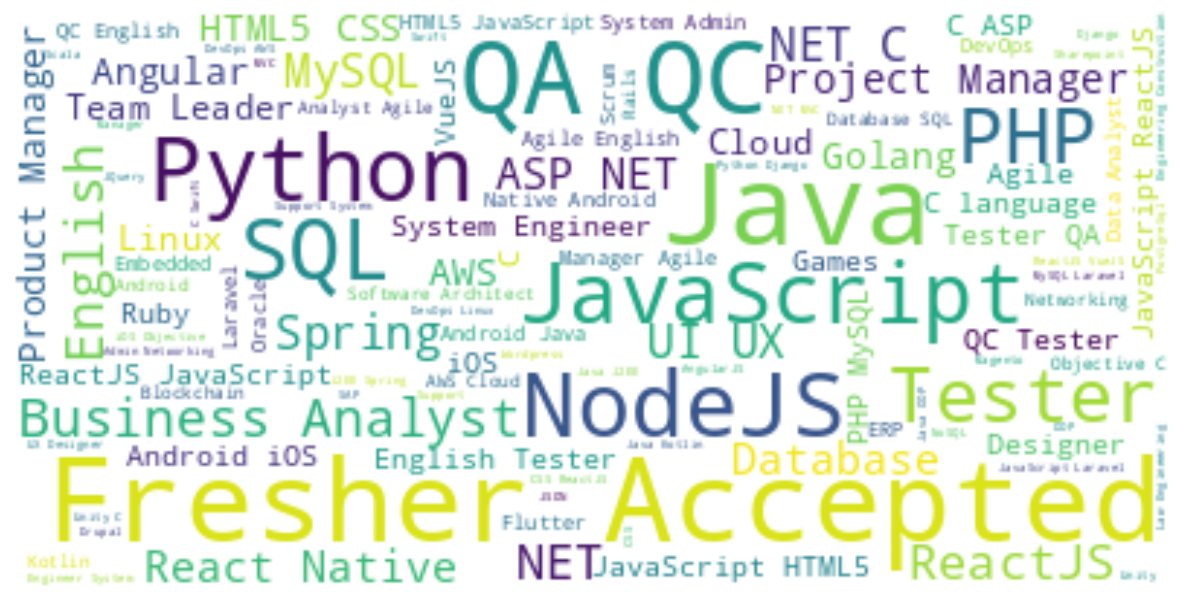

In [43]:
text = " ".join(i for i in data["taglist"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

features = data["job_name"].tolist()  # Assuming "data" is your DataFrame
tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(features)
similarity = cosine_similarity(tfidf_matrix)


In [45]:
indices = pd.Series(data.index, index=data['job_name']).drop_duplicates()

In [46]:
def jobs_recommendation(Title, similarity = similarity):
    index = indices[Title]
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[::], reverse=True)
    similarity_scores = similarity_scores[0:5]
    newsindices = [i[0] for i in similarity_scores]
    return data[['job_name', 'description', 
                 'taglist']].iloc[newsindices]

print(jobs_recommendation("(Jr/Sr) QA Engineer, KMS Labs - BONUS"))


                 job_name                                        description   
1421       Civil Engineer  789 Construction is seeking a motivated Civil ...  \
1420  Mechanical Engineer  PQR Engineering is hiring a Mechanical Enginee...   
1419             Advocate  GHI Law Firm is looking for a dedicated Advoca...   
1418       Civil Engineer  Join the team at 456 Infrastructure as a Civil...   
1417  Mechanical Engineer  LMN Engineering is seeking a talented Mechanic...   

           taglist  
1421  Construction  
1420   Engineering  
1419           Law  
1418  Construction  
1417   Engineering  


In [47]:
print(indices.keys())


Index(['(Jr/Sr) QA Engineer, KMS Labs - BONUS', 'Engineering Manager - BONUS',
       'Fullstack Mobile (Mobile,NodeJs) Kobiton',
       '(Jr/Sr/Principal) Java Developer- BONUS',
       'Product Manager, KMS Labs - BONUS',
       'Sr IT Business Analyst (English) - BONUS',
       'Fullstack Dev (ReactJs,NodeJs) - Kobiton',
       'Senior Ruby on Rails Engineer - BONUS', 'Senior Data Engineer - BONUS',
       'Sr/Jr Fullstack (NodeJS,ReactJS) - BONUS',
       ...
       'Advocate', 'Mechanical Engineer', 'Civil Engineer', 'job_name',
       'Advocate', 'Mechanical Engineer', 'Civil Engineer', 'Advocate',
       'Mechanical Engineer', 'Civil Engineer'],
      dtype='object', name='job_name', length=1422)
